In [1]:
import yfinance as yf
import pandas as pd

In [2]:
nvda = yf.Ticker("NVDA")

In [3]:
nvda = nvda.history(period="max")

In [4]:
nvda

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.401407,0.447998,0.356010,0.376319,271468800,0.0,0.0
1999-01-25 00:00:00-05:00,0.406185,0.420521,0.376319,0.415743,51048000,0.0,0.0
1999-01-26 00:00:00-05:00,0.420521,0.428884,0.377513,0.383487,34320000,0.0,0.0
1999-01-27 00:00:00-05:00,0.384682,0.394239,0.363177,0.382293,24436800,0.0,0.0
1999-01-28 00:00:00-05:00,0.382293,0.384682,0.378708,0.381098,22752000,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-16 00:00:00-04:00,434.500000,437.209991,426.609985,426.920013,65475500,0.0,0.0
2023-06-20 00:00:00-04:00,429.980011,439.899994,426.739990,438.079987,45115300,0.0,0.0
2023-06-21 00:00:00-04:00,435.010010,436.149994,420.799988,430.450012,55160300,0.0,0.0


In [5]:
nvda.index

DatetimeIndex(['1999-01-22 00:00:00-05:00', '1999-01-25 00:00:00-05:00',
               '1999-01-26 00:00:00-05:00', '1999-01-27 00:00:00-05:00',
               '1999-01-28 00:00:00-05:00', '1999-01-29 00:00:00-05:00',
               '1999-02-01 00:00:00-05:00', '1999-02-02 00:00:00-05:00',
               '1999-02-03 00:00:00-05:00', '1999-02-04 00:00:00-05:00',
               ...
               '2023-06-09 00:00:00-04:00', '2023-06-12 00:00:00-04:00',
               '2023-06-13 00:00:00-04:00', '2023-06-14 00:00:00-04:00',
               '2023-06-15 00:00:00-04:00', '2023-06-16 00:00:00-04:00',
               '2023-06-20 00:00:00-04:00', '2023-06-21 00:00:00-04:00',
               '2023-06-22 00:00:00-04:00', '2023-06-23 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=6145, freq=None)

<Axes: xlabel='Date'>

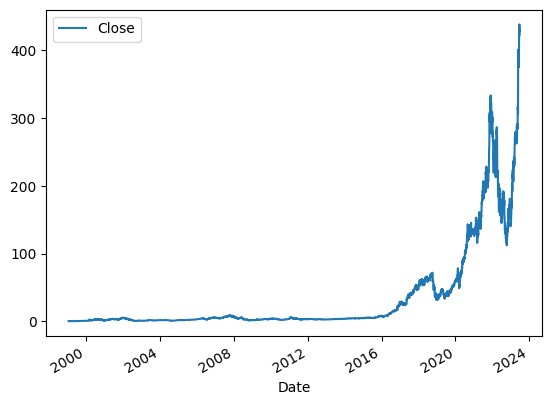

In [6]:
nvda.plot.line(y="Close", use_index=True)

In [7]:
del nvda["Dividends"]
del nvda["Stock Splits"]

In [8]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [9]:
nvda["NextYear"] = nvda["Close"].shift(-250)

In [10]:
nvda["Target"] = nvda["NextYear"]

In [11]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [12]:
predictors = ["Close", "Volume", "Open", "High", "Low"]

In [13]:
train = nvda.iloc[:-250]
test = nvda

In [14]:
reg.fit(train[predictors],train["Target"])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41712e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.1)

In [15]:
predictions = reg.predict(test[predictors])

In [16]:
combined = pd.concat([test["Target"], pd.Series(predictions, index=test.index)], axis=1)

In [17]:
combined.columns = ["actual", "predictions"]

In [18]:
combined

,actual,predictions
Date,,
1999-01-22 00:00:00-05:00,0.867326,-3.631189
1999-01-25 00:00:00-05:00,0.864936,8.419432
1999-01-26 00:00:00-05:00,0.855379,9.300699
1999-01-27 00:00:00-05:00,0.817150,9.862716
1999-01-28 00:00:00-05:00,0.809982,10.005052
...,...,...
2023-06-16 00:00:00-04:00,NaN,468.359489
2023-06-20 00:00:00-04:00,NaN,475.057340
2023-06-21 00:00:00-04:00,NaN,455.078321


<Axes: xlabel='Date'>

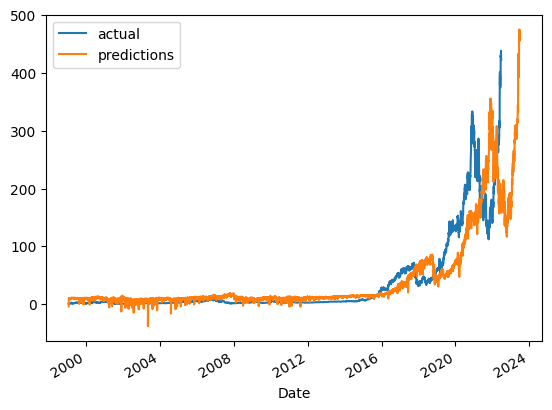

In [19]:
combined.plot()

In [20]:
myResults = combined.iloc[-300:]

<Axes: xlabel='Date'>

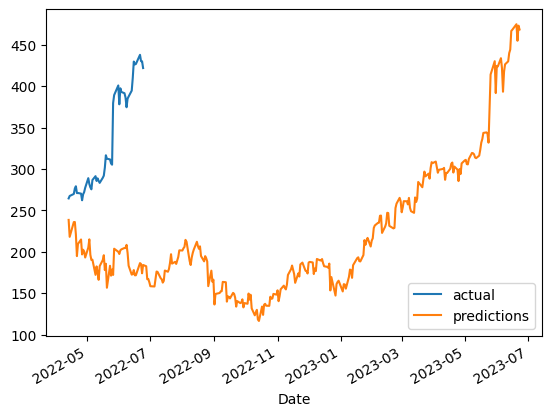

In [21]:
myResults.plot()

In [22]:
myResults

,actual,predictions
Date,,
2022-04-13 00:00:00-04:00,264.602631,238.626679
2022-04-14 00:00:00-04:00,267.552307,218.209110
2022-04-18 00:00:00-04:00,269.992035,235.997628
2022-04-19 00:00:00-04:00,276.641388,236.083025
2022-04-20 00:00:00-04:00,279.281097,221.164370
...,...,...
2023-06-16 00:00:00-04:00,NaN,468.359489
2023-06-20 00:00:00-04:00,NaN,475.057340
2023-06-21 00:00:00-04:00,NaN,455.078321


In [23]:
ourLow = myResults["predictions"].min()
ourLow

116.5562340503864

In [24]:
myResults.loc[myResults["predictions"]==ourLow]

,actual,predictions
Date,,
2022-10-14 00:00:00-04:00,NaN,116.556234


In [25]:
ourHigh = myResults["predictions"].max()
ourHigh

475.0573401146864

In [26]:
myResults.loc[myResults["predictions"]==ourHigh]

,actual,predictions
Date,,
2023-06-20 00:00:00-04:00,NaN,475.05734


In [27]:
lastMonth = myResults.iloc[-20:]

In [28]:
lastMonth

,actual,predictions
Date,,
2023-05-25 00:00:00-04:00,NaN,374.256703
2023-05-26 00:00:00-04:00,NaN,414.262724
2023-05-30 00:00:00-04:00,NaN,430.365622
2023-05-31 00:00:00-04:00,NaN,391.888438
2023-06-01 00:00:00-04:00,NaN,424.683259
2023-06-02 00:00:00-04:00,NaN,423.999657
2023-06-05 00:00:00-04:00,NaN,434.015412
2023-06-06 00:00:00-04:00,NaN,422.047990
2023-06-07 00:00:00-04:00,NaN,393.501896


In [29]:
lastMonth["predictions"]

Date
2023-05-25 00:00:00-04:00    374.256703
2023-05-26 00:00:00-04:00    414.262724
2023-05-30 00:00:00-04:00    430.365622
2023-05-31 00:00:00-04:00    391.888438
2023-06-01 00:00:00-04:00    424.683259
2023-06-02 00:00:00-04:00    423.999657
2023-06-05 00:00:00-04:00    434.015412
2023-06-06 00:00:00-04:00    422.047990
2023-06-07 00:00:00-04:00    393.501896
2023-06-08 00:00:00-04:00    417.644275
2023-06-09 00:00:00-04:00    426.592888
2023-06-12 00:00:00-04:00    430.187125
2023-06-13 00:00:00-04:00    440.223738
2023-06-14 00:00:00-04:00    444.427191
2023-06-15 00:00:00-04:00    466.932016
2023-06-16 00:00:00-04:00    468.359489
2023-06-20 00:00:00-04:00    475.057340
2023-06-21 00:00:00-04:00    455.078321
2023-06-22 00:00:00-04:00    473.274954
2023-06-23 00:00:00-04:00    468.711724
Name: predictions, dtype: float64

In [30]:
priceTarget = lastMonth["predictions"].mean()
priceTarget

433.77553809043593